In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from IPython.display import Image  
import pydotplus
import graphviz

In [2]:
iris = datasets.load_iris()
features = iris.feature_names
X = iris.data
Y = iris.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 14)

In [6]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 14)
# Train the classifier
clf.fit(X_train, Y_train)
clfpredict=clf.predict(X_test)
clfy_train_predict=clf.predict(X_train)


print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

1.0
0.95


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, clfpredict)

array([[25,  0,  0],
       [ 0, 18,  0],
       [ 0,  3, 14]], dtype=int64)

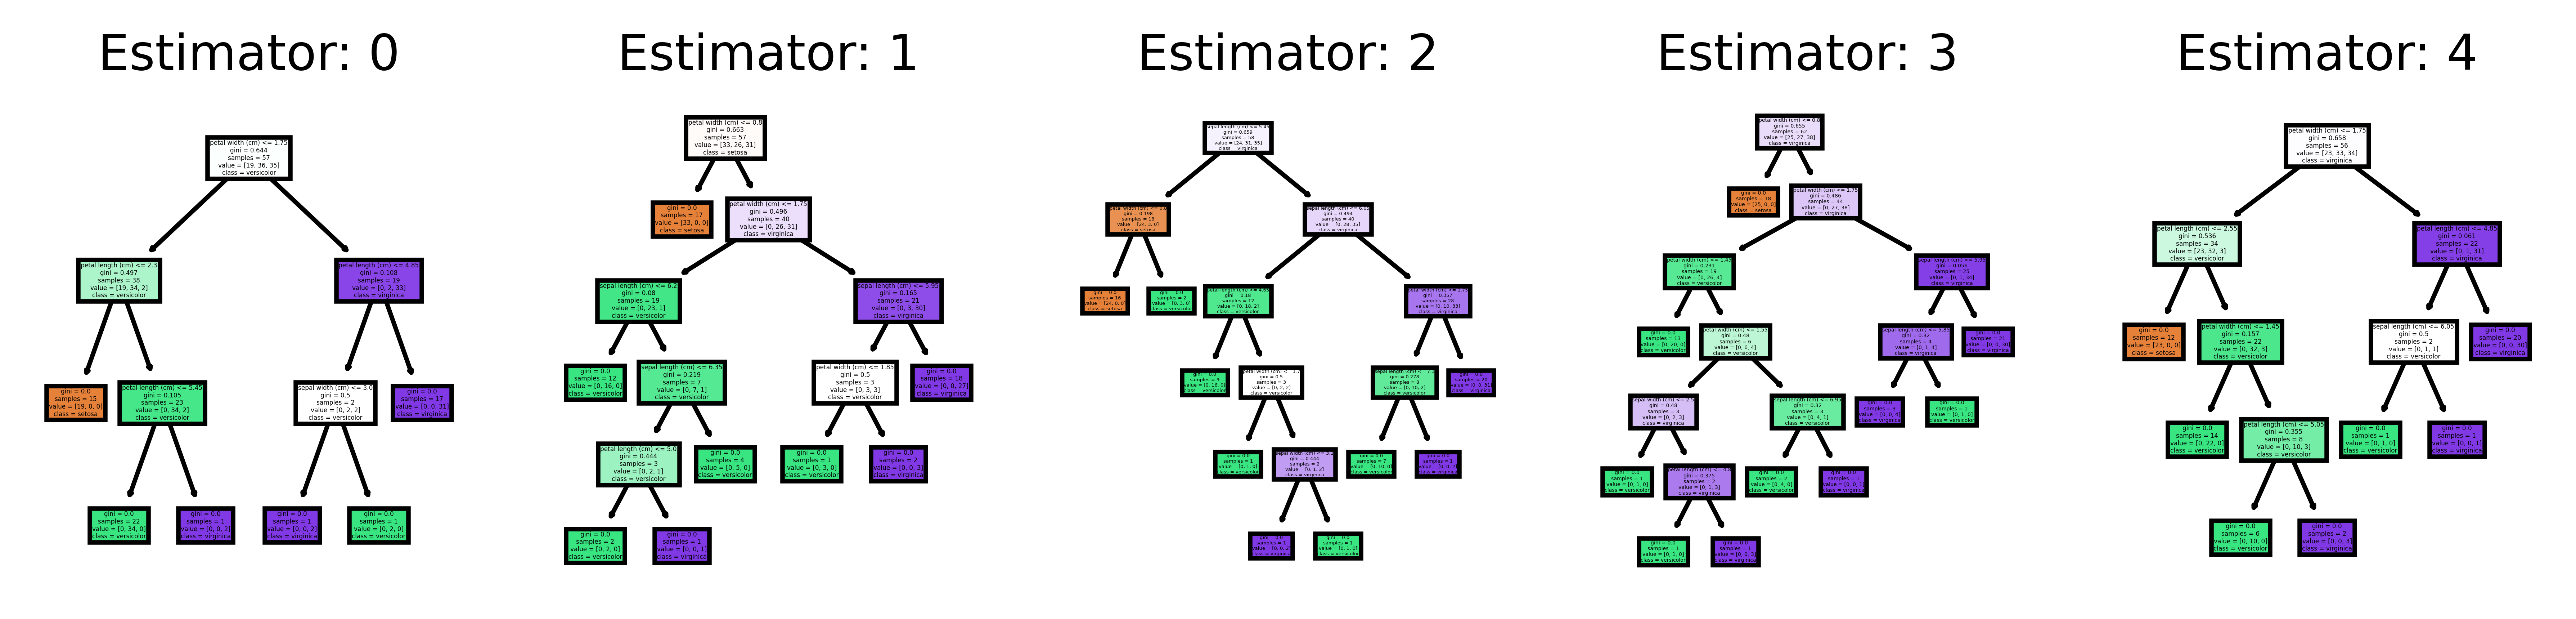

In [11]:
import matplotlib.pyplot as plt

feature_names=iris.feature_names
class_names=iris.target_names

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = feature_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('clf_5trees.png')

In [12]:
import pandas as pd

feature_importances = pd.DataFrame(clf.feature_importances_, index = features, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
petal width (cm)     0.561724
petal length (cm)    0.274751
sepal length (cm)    0.154692
sepal width (cm)     0.008833

In [13]:
# Making a classifier picking only important features, 
# picking only those features that have importance value greater than 0.15
sfm = SelectFromModel(clf, threshold = 0.15)

In [14]:
sfm.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                 random_state=14),
                threshold=0.15)

In [15]:
# Create a data subset picking only important features out of all the features.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [16]:
X_important_train.shape

(90, 3)

In [17]:
X_important_test.shape

(60, 3)

In [18]:
# New random forest classifier with only important features
clf_important = RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state = 14)

In [19]:
clf_important.fit(X_important_train, Y_train)
X_important_predict=clf_important.predict(X_important_test)

In [20]:
print(confusion_matrix(Y_test, X_important_predict ))
print(clf_important.score(X_important_test, Y_test))

[[25  0  0]
 [ 0 18  0]
 [ 0  3 14]]
0.95
